Dataset : 
https://www.kaggle.com/datasets/prosperchuks/health-dataset?resource=download

Dataset Columns:

•	Age: 13-level age category:  (1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 / 6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 / 11 = 70-74 / 12 = 75-79 / 13 = 80 or older) 

•	Sex: patient's gender (1: male; 0: female)

•	HighChol: 0 = no high cholesterol 1 = high cholesterol

•	CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

•	BMI: Body Mass Index

•	Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

•	HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

•	PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes

•	Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes

•	Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes

•	HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

•	GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

•	MentHlth: days of poor mental health scale 1-30 days

•	PhysHlth: physical illness or injury days in past 30 days scale 1-30

•	DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

•	Stroke: you ever had a stroke. 0 = no, 1 = yes

•	HighBP: 0 = no high, BP 1 = high BP

•	Hypertension: 0 = no hypertension, 1 = hypertension

•	Stroke: 0 = no, 1 = yes

•	Diabetes: 0 = no diabetes, 1 = diabetes


In [1]:
#import neccesary libraries

import pandas as pd # data manipulation and anaylsis
import numpy as np # numerical computing

from sklearn import preprocessing # data preprocessing 
from sklearn import utils # utility functions (checking data types and converting data)

import matplotlib.pyplot as plt # create various types of plots and visualizations
import seaborn as sb # data visualizations

from sklearn.model_selection import train_test_split # split datasets into training and testing subsets
from sklearn.preprocessing import StandardScaler # standardizes features
from sklearn.linear_model import LogisticRegression # Log Reg machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classification
from sklearn.svm import SVC # Support Vector machine

from sklearn.tree import DecisionTreeClassifier # Predictive model for classification and regression tasks
from sklearn.ensemble import RandomForestClassifier # Build multiple decision trees and combine their predictions to improve accuract and reduce overfitting.
from sklearn.ensemble import GradientBoostingClassifier # Build multiple weak learners sequentially .

from sklearn.pipeline import Pipeline # Chain mulitple steps in machine learning workflow

import joblib # efficient for saving and loading python objects. 

In [2]:
# Set dataframe 
df = pd.read_csv("diabetes.csv")

# Print dataframe
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,1.0,1.0,0.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0


In [3]:
#Print infomation about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

In [4]:
# Print columns of dateframe
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

In [5]:
# Check for null values
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

In [6]:
# Statistical information of data
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.500000,0.563458,0.062171
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.500004,0.495960,0.241468
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


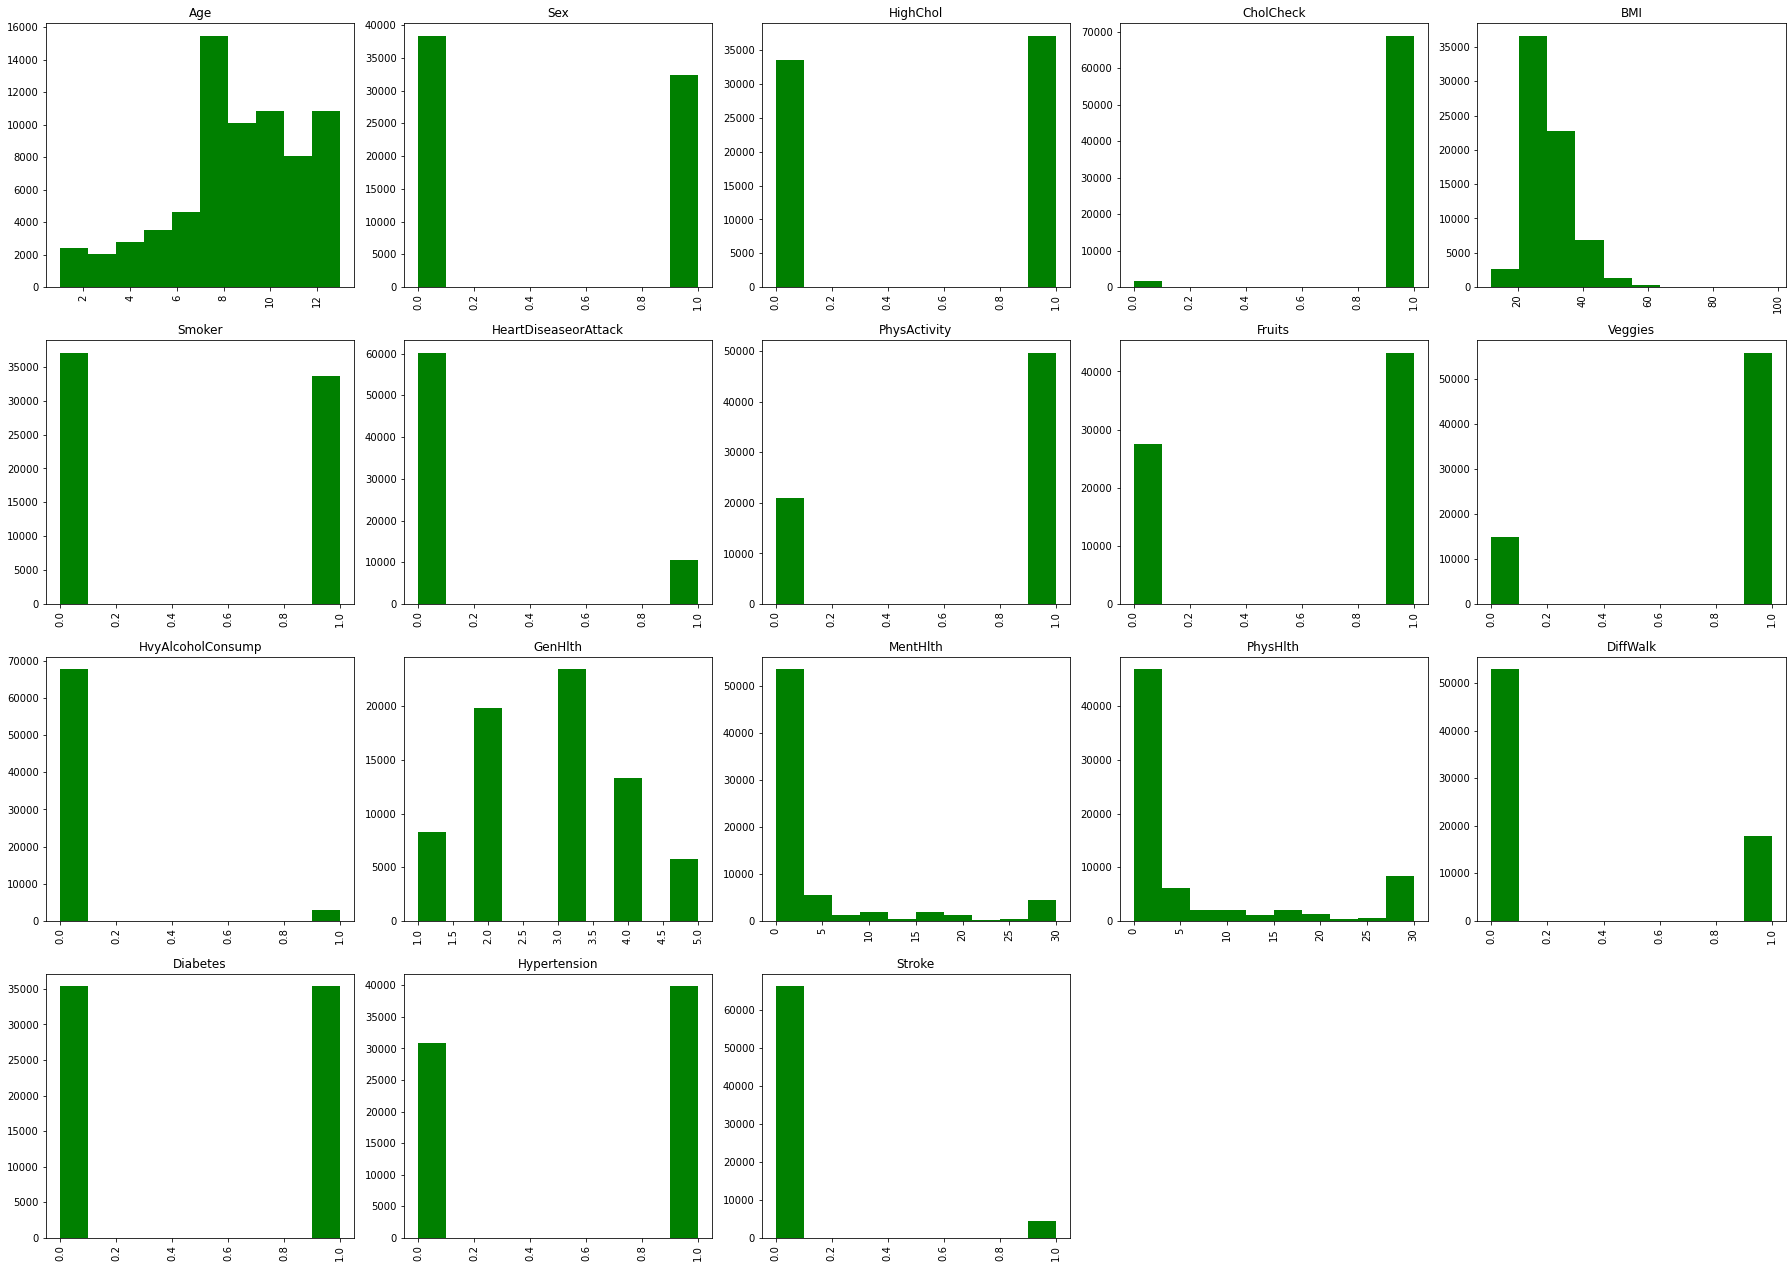

In [7]:
# Check frequency of all values in the columns
feature_cols = [x for x in df.columns if x not in 'stroke']
plt.figure(figsize=(25,35))

# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[feature_cols[i]],color = "green")
    
plt.tight_layout()

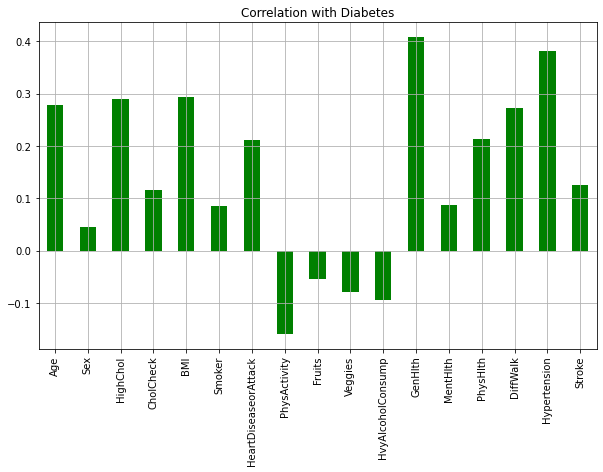

In [8]:
#check correlation of other columns with diabetes column
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes",color="green");

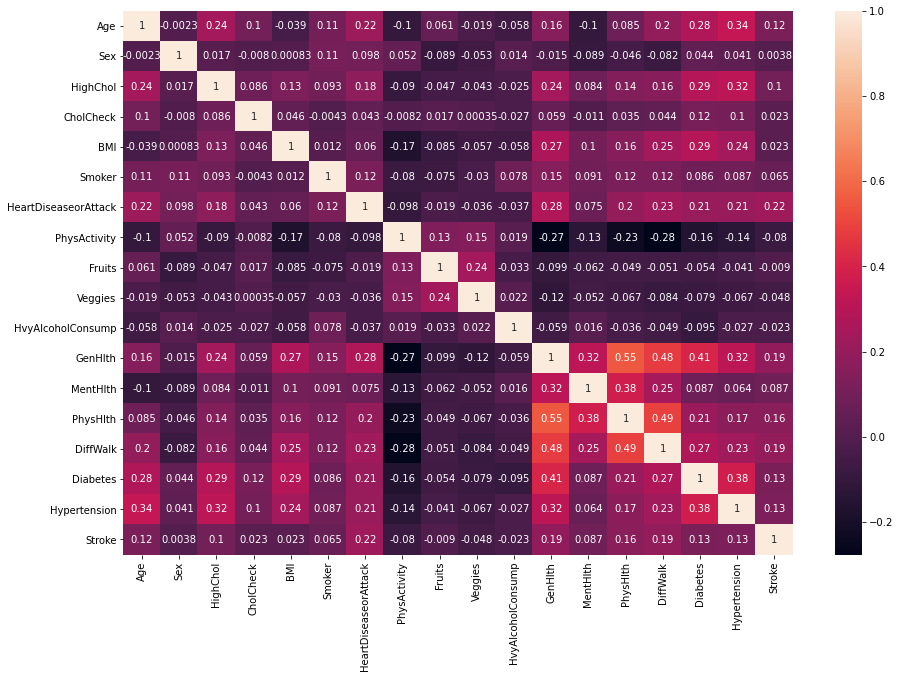

In [9]:
# Print correlation heatmap.
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
# Print columns so that we can copy them and replace values
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

In [11]:
# Drop the columns that are not closely related to the diabetes
df.drop(['HvyAlcoholConsump','Stroke','Sex','Smoker','Fruits','Veggies','PhysActivity','MentHlth'], axis=1, inplace=True)


In [12]:
df

,Age,HighChol,CholCheck,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Diabetes,Hypertension
0,4.0,0.0,1.0,26.0,0.0,3.0,30.0,0.0,0.0,1.0
1,12.0,1.0,1.0,26.0,0.0,3.0,0.0,0.0,0.0,1.0
2,13.0,0.0,1.0,26.0,0.0,1.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,0.0,3.0,3.0,0.0,0.0,1.0
4,8.0,0.0,1.0,29.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
70687,6.0,1.0,1.0,37.0,0.0,4.0,0.0,0.0,1.0,0.0
70688,10.0,1.0,1.0,29.0,1.0,2.0,0.0,1.0,1.0,0.0
70689,13.0,1.0,1.0,25.0,1.0,5.0,0.0,1.0,1.0,1.0
70690,11.0,1.0,1.0,18.0,0.0,4.0,0.0,1.0,1.0,1.0


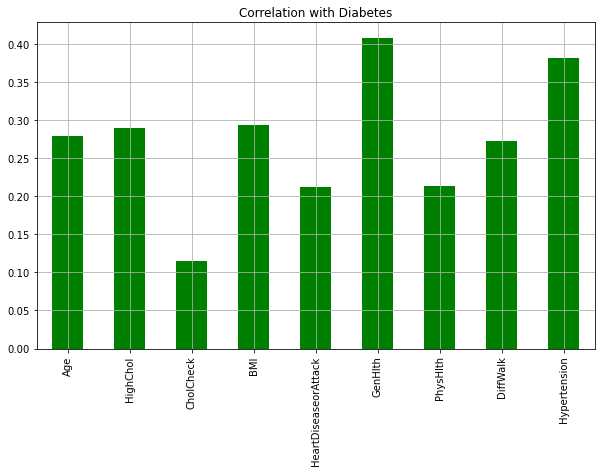

In [13]:
#check correlation one more time 
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes",color="green");

In [14]:
# Store feature matrix and target matrix 
X = df.drop ('Diabetes', axis = 1)
y = df['Diabetes']

In [15]:
# Convert continuous values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

# print to make sure it worked 
print(y_transformed)

[0 0 0 ... 1 1 1]


In [16]:
# Split dataset into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y_transformed, test_size=0.20,
                                                 random_state=42)

In [17]:
# Create pipelines
# Standard scaler to measure everything on the same level 
pipeline_logreg = Pipeline([('scaler1', StandardScaler()), 
                            # to standardize input features and remove mean so that everything is measures on the same scale. 
                           ('logreg_classifier', LogisticRegression())])
                            # predicts the probability that an input belongs to a particualr classs. 
pipeline_knn = Pipeline([('scaler2', StandardScaler()),
                         # to standardize input features
                         ('knn_classifier',KNeighborsClassifier())])
                        # predicts class of input based on "k-nearst neighbor"
pipeline_svc = Pipeline([('scaler3', StandardScaler()),
                         # standardize put features
                        ('svc_classifier',SVC())])
                        # optimizes hyperplane parameters and margin to achieve best seperation classes.
pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])
                        # make "tree like" models that make decisions based on features values and create hierachical splits
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(max_depth=3))])
                        # builds multiple decisions and combine predictions to improve accuracy and reduce over fitting , my favorite
pipeline_gbc = Pipeline([('gbc_classifier',GradientBoostingClassifier())])
                        # builds decisions trees(or other weak learners) and fix the error of the previous one.


In [18]:
pipelines = [pipeline_logreg,
            pipeline_knn,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc]

In [19]:
#Train pipelines
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [20]:
#create pipeline dictionary
pipe_dict = {0:'LR',
            1:'KNN',
            2:'SVC',
            3:'DT',
            4:'RF',
            5:'GBC'}

In [21]:
#print pipeline dictionary
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}

In [22]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)*100))

LR Test Accuracy:74.55972841077869
KNN Test Accuracy:71.3628969516939
SVC Test Accuracy:74.36876723955018
DT Test Accuracy:68.36409929980903
RF Test Accuracy:73.16641912440767
GBC Test Accuracy:75.19626564820709


In [23]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop ('Diabetes', axis = 1)
y = df['Diabetes']

rf = RandomForestClassifier(max_depth=3)
rf.fit(X,y_transformed)

RandomForestClassifier(max_depth=3)

In [24]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler

X = df.drop ('Diabetes', axis = 1)
y = df['Diabetes']

svc = StandardScaler()
svc.fit_transform(X,y_transformed)

array([[-1.60723742, -1.05279808,  0.15927581, ...,  2.40400793,
        -0.58155367,  0.88020109],
       [ 1.19768093,  0.94984976,  0.15927581, ..., -0.57745057,
        -0.58155367,  0.88020109],
       [ 1.54829572, -1.05279808,  0.15927581, ...,  0.41636893,
        -0.58155367, -1.13610402],
       ...,
       [ 1.54829572,  0.94984976,  0.15927581, ..., -0.57745057,
         1.71953175,  0.88020109],
       [ 0.84706614,  0.94984976,  0.15927581, ..., -0.57745057,
         1.71953175,  0.88020109],
       [ 0.14583655,  0.94984976,  0.15927581, ..., -0.57745057,
        -0.58155367,  0.88020109]])

In [25]:
#Testing prediction data 
pred_data = pd.DataFrame({
    'Age':3, # 32
    'Sex':0, # Female
    'HighChol': 0 ,# No high cholesterol
    'CholCheck':0, # No cholesterol check in 5 years
    'BMI': 24, # BMI of 24
    'Smoker': 1, # yes
    'HeartDiseaseorAttack': 0, # No heart disease or attack 
    'PhysActivity' : 0, # no in last 30 days                                       
    'Fruits': 0, # no did not consume fruit
    'Veggies' : 1 , # yes consumed veggies
    'HvyAlcoholConsump': 0, # no heavy alcohol consumption
    'GenHlth': 4, # general health is "fair"
    'MentHlth': 20, # 20/30 day bad mental '                
    'PhysHlth': 1, # 1 illnesss day in last 30 days             
    'DiffWalk': 1, # difficulty walking/climbing stairs
    'Hypertension': 0, # no hypertension
    'Stroke': 0 # no 
}, index = [0])

In [26]:
d2= svc.fit_transform(pred_data)

if d2[0]== 0:
    print('non-diabetic')
else:
    print('diabetic')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
d = rf.predict(pred_data)
if d[0]== 0:
    print('non-diabetic')
else:
    print('diabetic')